In [484]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

### On cherche à régresser decision_o, qui est une variable binaire. Dans notre cas, une régression logistique est le modèle qui nous semble ainsi le plus approprié. 

In [485]:
df = pd.read_csv('data/speeddating modified.csv')

In [486]:
df_perso = pd.read_csv('data/speeddating personal.csv')

In [487]:
df2 = df.copy()

In [488]:
caractéristiques_fixes = ['race', 'age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [489]:
variables_quantitatives = ['age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [490]:
variables_qualitatives = ['race']

#### On vérifie s'il y a des valeurs manquantes

In [491]:
df2[caractéristiques_fixes].isna().any(axis=1).sum()

0

#### Il n'y en a pas on peut bien effectuer la régression logistique !

## Préparation des données

In [492]:
df2[caractéristiques_fixes].describe()

,age,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
count,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000
mean,26.355829,6.436716,4.579851,6.253868,7.802899,7.017542,6.741625,5.720794,3.887197,5.755878,7.690584,5.310391,6.804605,7.945791,6.858813,7.872092,5.653795,4.355342
std,3.570878,2.610645,2.803070,2.407928,1.733285,2.010495,2.227087,2.575754,2.621686,2.486826,1.993229,2.531265,2.197725,1.654299,2.127324,1.748353,2.609448,2.719785
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,24.000000,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,3.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,6.000000,7.000000,4.000000,2.000000
50%,26.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000
75%,28.000000,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000
max,55.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### On centre-réduit les variables quantitatives car on a également des variables catégorielles que l'on va encoder avec la méthode One-Hot Encoding.
#### De plus, les différences de variance sont relativement importantes entre certaines variables, cela nous permet d'harmoniser donc nos données.

In [493]:
to_scale = df2[variables_quantitatives]
scaler=StandardScaler()
scaler.fit(to_scale)

StandardScaler()

In [494]:
scaled_features = scaler.transform(to_scale) # Reduce and center the quantitative variables
scaled_features

array([[-1.49995453,  0.98191823, -0.92042245, ...,  0.64516568,
         0.89917407, -1.23375416],
       [-1.49995453,  0.98191823, -0.92042245, ...,  0.64516568,
         0.89917407, -1.23375416],
       [-1.49995453,  0.98191823, -0.92042245, ...,  0.64516568,
         0.89917407, -1.23375416],
       ...,
       [-0.37971373,  0.59884786, -0.92042245, ...,  1.21716752,
         0.51592797, -0.49835713],
       [-0.37971373,  0.59884786, -0.92042245, ...,  1.21716752,
         0.51592797, -0.49835713],
       [-0.37971373,  0.59884786, -0.92042245, ...,  1.21716752,
         0.51592797, -0.49835713]])

In [495]:
df_scaled = pd.DataFrame(scaled_features, columns=variables_quantitatives)
df_scaled

,age,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
1,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
2,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
3,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
4,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8205,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8206,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8207,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357


In [496]:
qltv_df = df2[['race']]
pfl_df = pd.get_dummies(qltv_df)
pfl_df

,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8204,0,0,1,0,0
8205,0,0,1,0,0
8206,0,0,1,0,0
8207,0,0,1,0,0


### On renomme les variables pour produire un graphique lisible

In [497]:
final_df = pd.concat([pfl_df, df_scaled], axis = 1)
final_df.rename(columns = {'race_asian/pacific islander/asian-american' : 'asian',
                             'race_black/african american': 'black',
                             'race_european/caucasian-american': 'caucasian',
                             'race_latino/hispanic american': 'latino'}, inplace = True)

In [498]:
final_df

,asian,black,caucasian,latino,race_other,age,sports,tvsports,exercise,dining,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
1,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
2,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
3,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
4,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8205,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8206,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8207,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357


In [499]:
x = final_df
y = df2['decision_o']

### Quelle modèle choisir ?

In [500]:
#fractionner dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [501]:
#instanciation du modèle
modele_regLog = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(x_train,y_train)
#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

58.938139308329276


In [502]:
#instanciation du modèle
modele_regLin = LinearRegression()
#training
modele_regLin.fit(x_train,y_train)
#précision du modèle
precision = modele_regLin.score(x_test,y_test)
print(precision*100)

3.0949201494899548


### Même si la régression logistique n'est pas extrêmement précise, elle l'est bien plus que la régression linéaire.

In [503]:
results_df = pd.DataFrame(np.concatenate([modele_regLog.intercept_.reshape(-1,1),
                             modele_regLog.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T

In [504]:
sorted_df = results_df.sort_values('coef').transpose()
sorted_df

,asian,constante,gaming,race_other,museums,age,movies,tvsports,theater,tv,...,reading,caucasian,hiking,art,exercise,sports,dining,clubbing,shopping,latino
coef,-0.37121,-0.290028,-0.150614,-0.11565,-0.107059,-0.100046,-0.053104,-0.048447,-0.044271,-0.038691,...,0.023392,0.054714,0.055944,0.083386,0.092943,0.095924,0.103625,0.103741,0.136017,0.136746


#### Régression logistique de decision_o sur les caractéristiques fixes dans la population totale

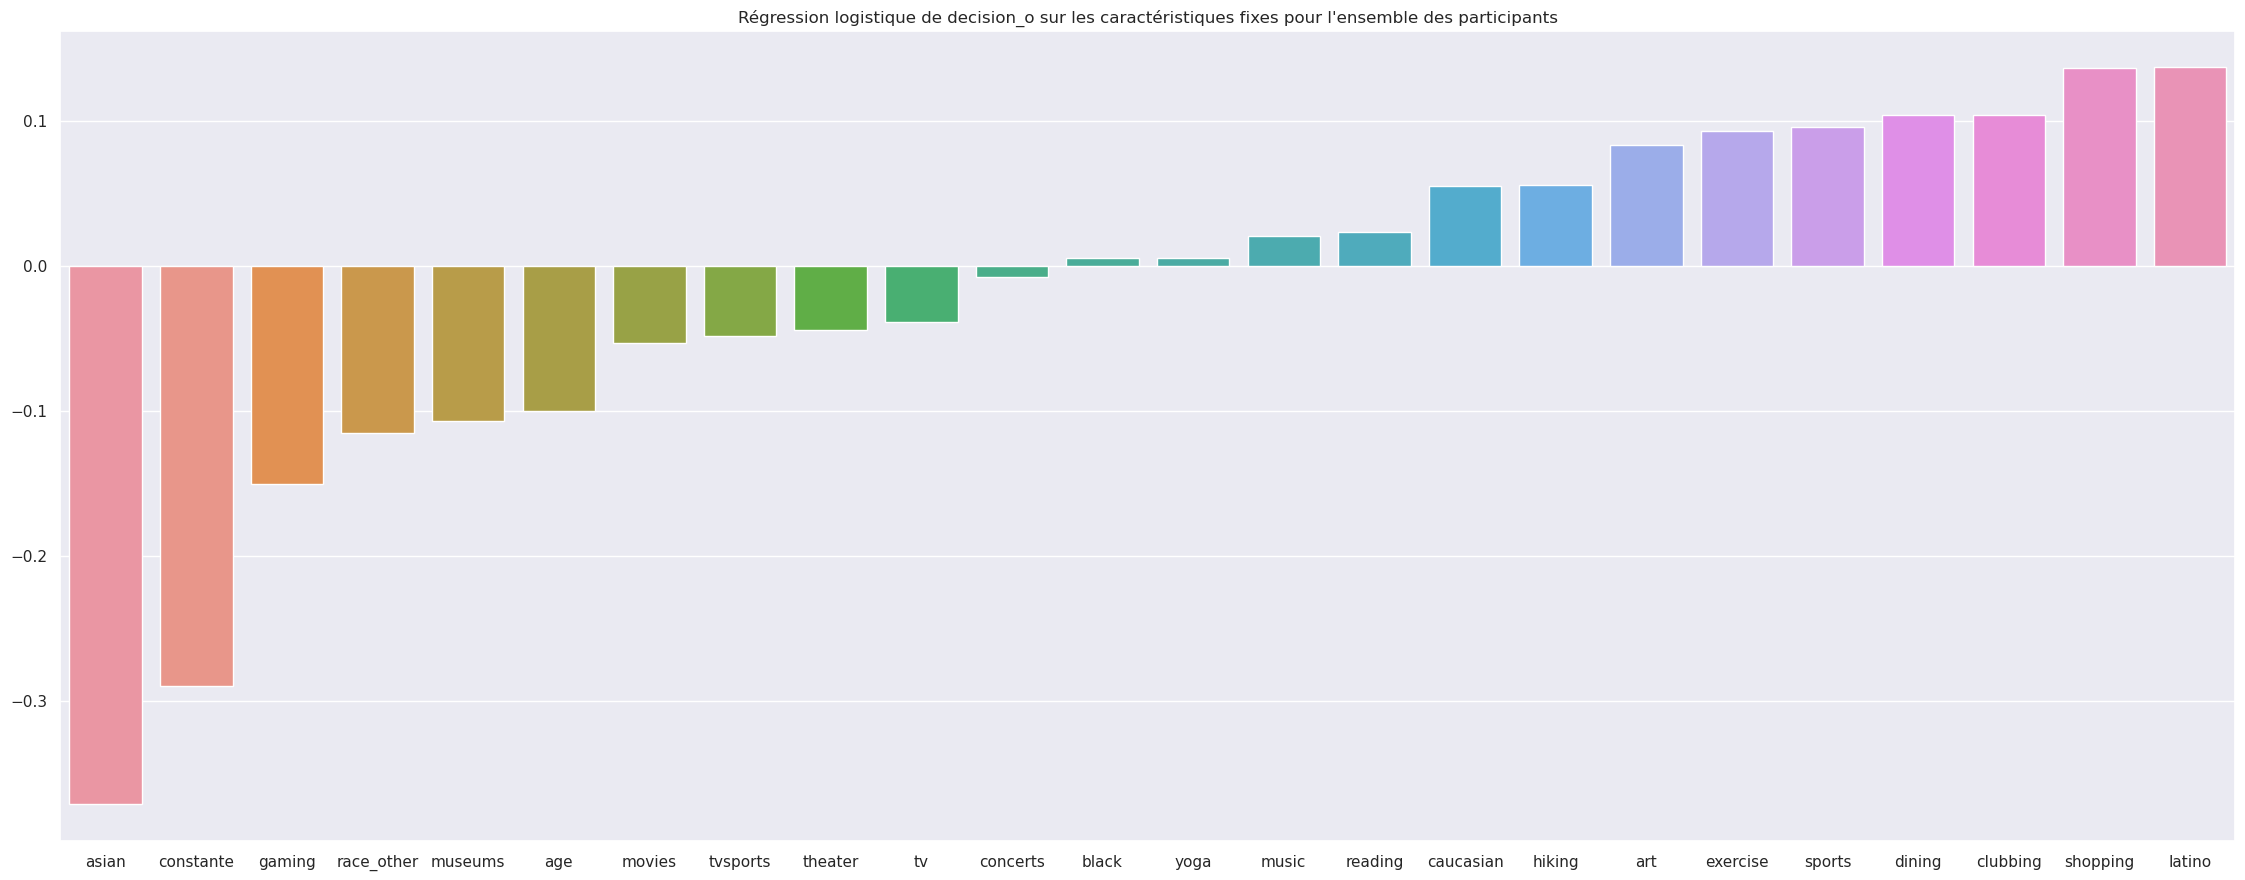

In [505]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.set(font_scale=1)
sns.barplot(sorted_df).set(title="Régression logistique de decision_o sur les caractéristiques fixes pour l'ensemble des participants")
plt.show()

### Faire une simple analyse des coeff, peut-être remarquer des choses curieuses (coeff négatif d'asian, coeff positif de latino, coeff négatif de l'âge...)

## On va maintenant effectuer la même régression en séparant les hommes et les femmes, pour observer si ces derniers ont les mêmes critères de sélection

## I) Le cas des femmes

### Dans cette partie, on s'intéresse aux caractéristiques des hommes que les femmes préfèrent

In [509]:
to_scale_m = df2[df2['gender'] == 'male'][variables_quantitatives]
scaler_m=StandardScaler()
scaler_m.fit(to_scale_m)

StandardScaler()

In [510]:
qltv_df_m = df2[df2['gender'] == 'male'][['race']]
pfl_df_m = pd.get_dummies(qltv_df_m)
pfl_df_m

,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other
100,0,0,1,0,0
101,0,0,1,0,0
102,0,0,1,0,0
103,0,0,1,0,0
104,0,0,1,0,0
...,...,...,...,...,...
8204,0,0,1,0,0
8205,0,0,1,0,0
8206,0,0,1,0,0
8207,0,0,1,0,0


In [511]:
scaled_features_m = scaler_m.transform(to_scale_m) # Reduce and center the quantitative variables
df_scaled_m = pd.DataFrame(scaled_features_m, columns=variables_quantitatives)
qltv_df_m = df2[df2['gender'] == 'male'][['race']]
pfl_df_m = pd.get_dummies(qltv_df_m)
final_df_m = pd.concat([pfl_df_m.reset_index(), df_scaled_m], axis = 1)
final_df_m.rename(columns = {'race_asian/pacific islander/asian-american' : 'asian',
                             'race_black/african american': 'black',
                             'race_european/caucasian-american': 'caucasian',
                             'race_latino/hispanic american': 'latino'}, inplace = True)
final_df_m

,index,asian,black,caucasian,latino,race_other,age,sports,tvsports,exercise,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,100,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
1,101,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
2,102,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
3,103,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
4,104,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,8204,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544
4132,8205,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544
4133,8206,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544
4134,8207,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544


In [512]:
x_m = final_df_m
y_m = df2[df2['gender'] == 'male']['decision_o']

In [513]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_m, y_m, random_state = 0)

In [514]:
#instanciation du modèle
modele_regLog_m = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog_m.fit(x_train_m,y_train_m)
#précision du modèle
precision_m = modele_regLog_m.score(x_test_m,y_test_m)
print(precision_m*100)

62.76595744680851


In [515]:
results_df_m = pd.DataFrame(np.concatenate([modele_regLog_m.intercept_.reshape(-1,1),
                             modele_regLog_m.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x_h.columns)).T
sorted_df_m = results_df_m.sort_values('coef').transpose()
sorted_df_m

,constante,asian,race_other,black,museums,concerts,age,tv,gaming,latino,...,reading,yoga,tvsports,shopping,clubbing,sports,music,art,dining,caucasian
coef,-0.772394,-0.549995,-0.21222,-0.149909,-0.14975,-0.138194,-0.1123,-0.081297,-0.058584,-0.058201,...,0.010818,0.024017,0.038745,0.058244,0.081005,0.129839,0.132035,0.14111,0.17814,0.197932


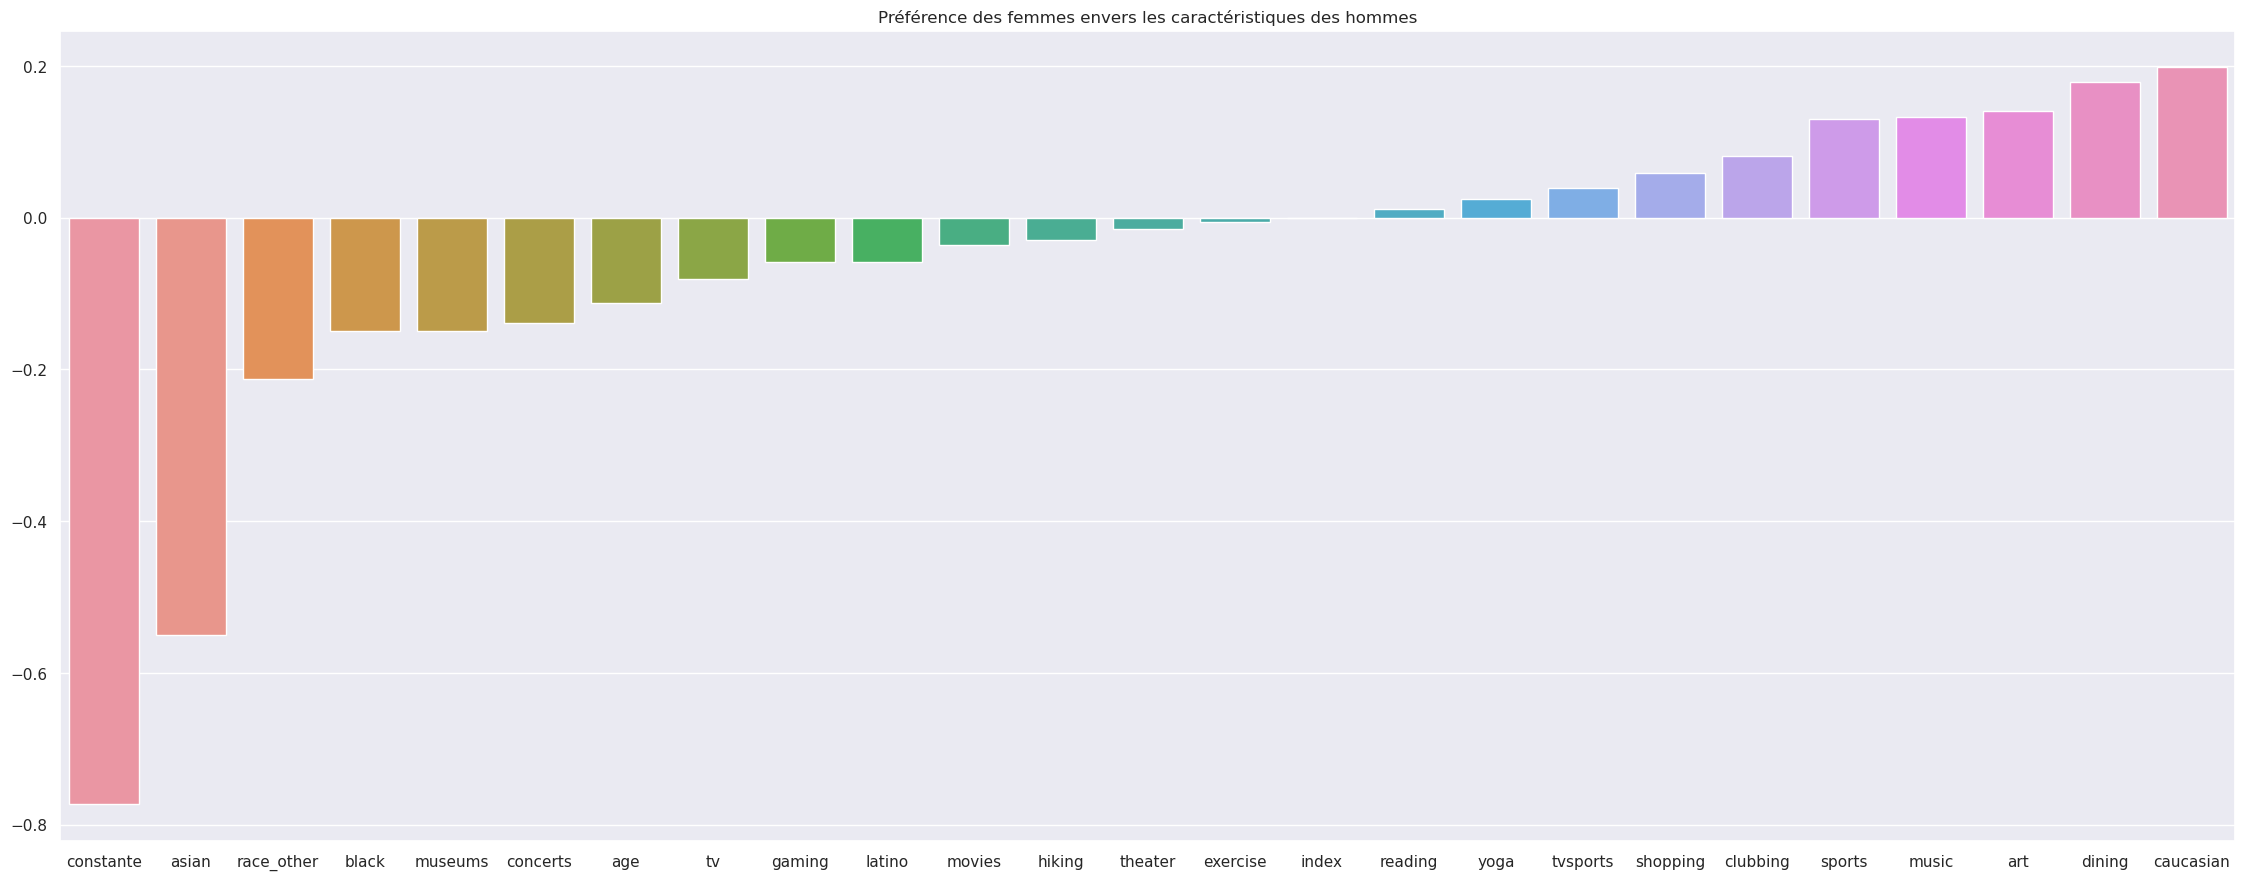

In [516]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.barplot(sorted_df_m).set(title="Préférence des femmes envers les caractéristiques des hommes")
plt.show()

## Faire une simple analyse des coeff aussi, ce que les femmes semblent aimer, ne pas aimer (Force à toi Régis)

#### II) Le cas des hommes

### Dans cette partie, on s'intéresse cette fois-ci aux caractéristiques des femmes que les hommes préfèrent

In [520]:
to_scale_f = df2[df2['gender'] == 'female'][variables_quantitatives]
scaler_f=StandardScaler()
scaler_f.fit(to_scale)

StandardScaler()

In [521]:
qltv_df_f = df2[df2['gender'] == 'female'][['race']]
pfl_df_f = pd.get_dummies(qltv_df_f)
pfl_df_f

,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7720,1,0,0,0,0
7721,1,0,0,0,0
7722,1,0,0,0,0
7723,1,0,0,0,0


In [522]:
scaled_features_f = scaler_f.transform(to_scale_f) # Reduce and center the quantitative variables
df_scaled_f = pd.DataFrame(scaled_features_f, columns=variables_quantitatives)
qltv_df_f = df2[df2['gender'] == 'female'][['race']]
pfl_df_f = pd.get_dummies(qltv_df_f)
final_df_f = pd.concat([pfl_df_f.reset_index(), df_scaled_f], axis = 1)
final_df_f.rename(columns = {'race_asian/pacific islander/asian-american' : 'asian',
                             'race_black/african american': 'black',
                             'race_european/caucasian-american': 'caucasian',
                             'race_latino/hispanic american': 'latino'}, inplace = True)
del final_df_f['index']
final_df_f

,asian,black,caucasian,latino,race_other,age,sports,tvsports,exercise,dining,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.476680,0.645166,0.899174,-1.233754
1,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.476680,0.645166,0.899174,-1.233754
2,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.476680,0.645166,0.899174,-1.233754
3,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.476680,0.645166,0.899174,-1.233754
4,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.476680,0.645166,0.899174,-1.233754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,1,0,0,0,0,-1.219894,0.215777,1.933765,-0.520757,-1.040227,...,1.187401,0.098172,-2.353402,-0.122630,0.543957,1.241815,1.006578,1.217168,0.132682,-0.498357
4069,1,0,0,0,0,-1.219894,0.215777,1.933765,-0.520757,-1.040227,...,1.187401,0.098172,-2.353402,-0.122630,0.543957,1.241815,1.006578,1.217168,0.132682,-0.498357
4070,1,0,0,0,0,-1.219894,0.215777,1.933765,-0.520757,-1.040227,...,1.187401,0.098172,-2.353402,-0.122630,0.543957,1.241815,1.006578,1.217168,0.132682,-0.498357
4071,1,0,0,0,0,-1.219894,0.215777,1.933765,-0.520757,-1.040227,...,1.187401,0.098172,-2.353402,-0.122630,0.543957,1.241815,1.006578,1.217168,0.132682,-0.498357


In [523]:
x_f = final_df_f
y_f = df2[df2['gender'] == 'female']['decision_o']
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, random_state = 0)

In [524]:
#instanciation du modèle
modele_regLog_f = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog_f.fit(x_train_f,y_train_f)
#précision du modèle
precision_f = modele_regLog_f.score(x_test_f,y_test_f)
print(precision_f*100)

57.801766437684


In [525]:
np.concatenate([modele_regLog_f.intercept_.reshape(-1,1),modele_regLog_f.coef_],axis=1)

array([[-0.15353778, -0.19182827, -0.02453968,  0.05349339,  0.14082946,
        -0.13149268, -0.11874839,  0.05344572, -0.17373196,  0.20595213,
        -0.04503885,  0.12208549, -0.04743638,  0.07857294, -0.0395964 ,
         0.0673638 ,  0.00451996, -0.07280304, -0.05675714, -0.03212686,
         0.02600431, -0.11817745,  0.11286706,  0.00835389]])

In [526]:
results_df_f = pd.DataFrame(np.concatenate([modele_regLog_f.intercept_.reshape(-1,1),
                             modele_regLog_f.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x_f.columns)).T
sorted_df_f = results_df_f.sort_values('coef').transpose()

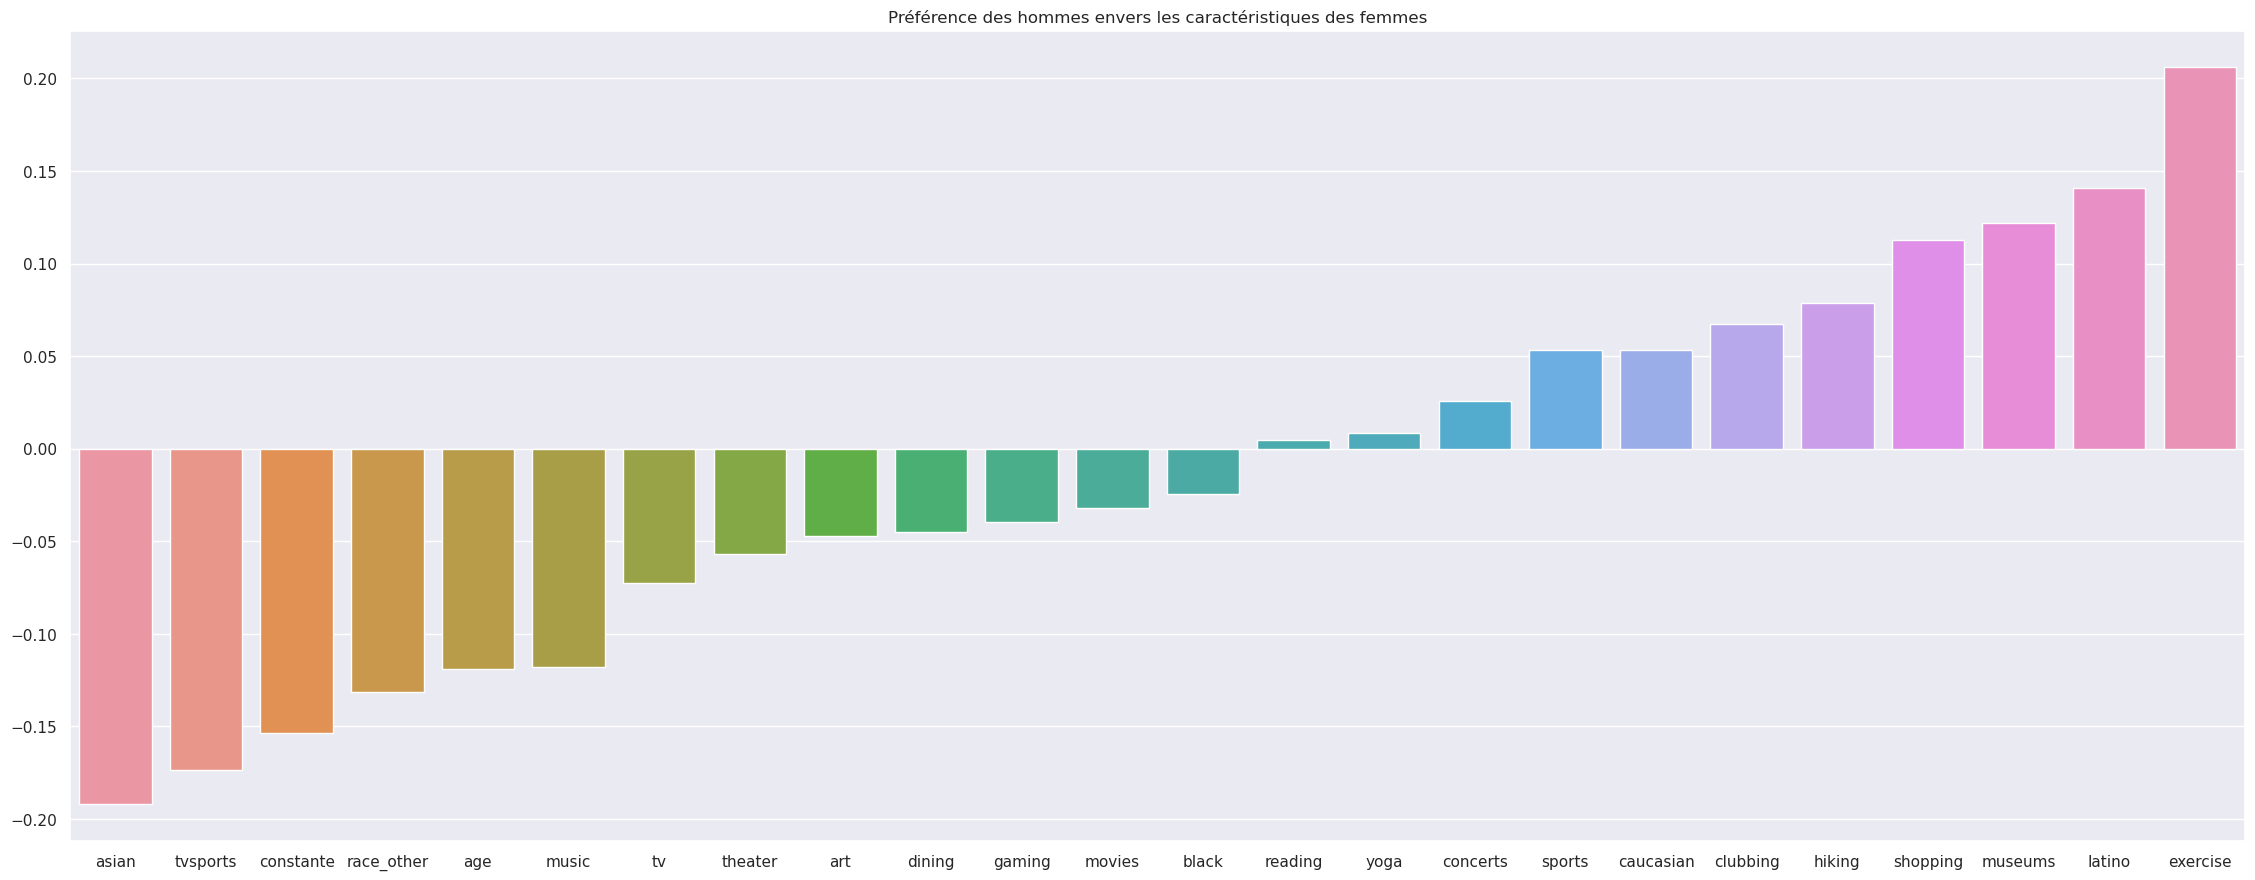

In [527]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.barplot(sorted_df_f).set(title="Préférence des hommes envers les caractéristiques des femmes")
plt.show()

## Analyse des coeff à faire également, tu peux dire que les hommes sont des gros porcs car ils veulent juste une latina bien géchar btw tqt ^^ la constante est aussi beaucoup plus faible, donc jsp comment interpréter ça mais peut-être que ça veut dire que de manière générale les hommes sont moins sélectifs ?

## (OPTIONNEL) Régression de decision_o sur les notes reçues = ['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitious_o', 'shared_interests_o']

### Dans cette partie, on va voir si un trait physique/de la personnalité a une grande influence dans la décision du partenaire. Les notes reçues correspondent aux notes que le partenaire donne à l'individu.

In [528]:
notes_reçues = ['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambition_o', 'shared_interests_o']

In [529]:
df2[notes_reçues + ['decision_o']].isna().any(axis=1).sum()

1310

### On supprime d'abord les valeurs manquantes 

In [530]:
df3 = df2[notes_reçues + ['decision_o']].dropna()

In [531]:
df3.describe()

,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_o,decision_o
count,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000
mean,6.181389,7.160168,7.362081,6.393390,6.756849,5.460719,0.429483
std,1.953262,1.748545,1.561906,1.961478,1.797939,2.150130,0.495038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,0.000000
50%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,0.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,1.000000
max,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,1.000000


In [532]:
to_scale_n = df3[notes_reçues]
scaler_n=StandardScaler()
scaler_n.fit(to_scale_n)

StandardScaler()

In [533]:
scaled_features_n = scaler_n.transform(to_scale_n) # Reduce and center the quantitative variables
df_scaled_n = pd.DataFrame(scaled_features_n, columns=notes_reçues)
df_scaled_n
final_df_n = pd.concat([df_scaled_n.reset_index(), df3['decision_o'].reset_index()], axis = 1)
del final_df_n['index']
final_df_n

,attractive_o,sincere_o,intelligence_o,funny_o,ambition_o,shared_interests_o,decision_o
0,-0.092871,0.480338,0.408453,0.819140,0.691481,0.250831,0
1,0.419130,0.480338,1.689032,0.309284,0.135249,-0.214290,0
2,1.955134,1.624229,1.689032,1.838854,1.803947,2.111319,1
3,0.419130,0.480338,1.048742,0.819140,1.247714,1.181075,1
4,0.931131,-0.091607,1.048742,-0.200573,1.247714,0.715953,1
...,...,...,...,...,...,...,...
6894,1.955134,-1.235498,-2.792996,-2.239999,-0.420984,-0.214290,1
6895,-0.092871,-2.379389,-0.231837,-1.730142,0.135249,-1.609656,0
6896,-2.140876,-3.523280,-3.433286,-2.239999,-2.645915,-2.074778,0
6897,-0.604872,-0.091607,-1.512417,-0.710429,-2.089682,0.250831,1


In [534]:
x_n=final_df_n[notes_reçues]
y_n=final_df_n['decision_o']
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, random_state = 0)

In [535]:
#instanciation du modèle
modele_regLog_n = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog_n.fit(x_train_n,y_train_n)
#précision du modèle
precision_n = modele_regLog_n.score(x_test_n,y_test_n)
print(precision_n*100)

74.72463768115942


### On peut souligner une précision de notre régression logistique meilleure qu'auparavant ! 🥳🥳🥳

In [536]:
results_df_n = pd.DataFrame(np.concatenate([modele_regLog_n.intercept_.reshape(-1,1),
                             modele_regLog_n.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x_n.columns)).T
sorted_df_n = results_df_n.sort_values('coef').transpose()

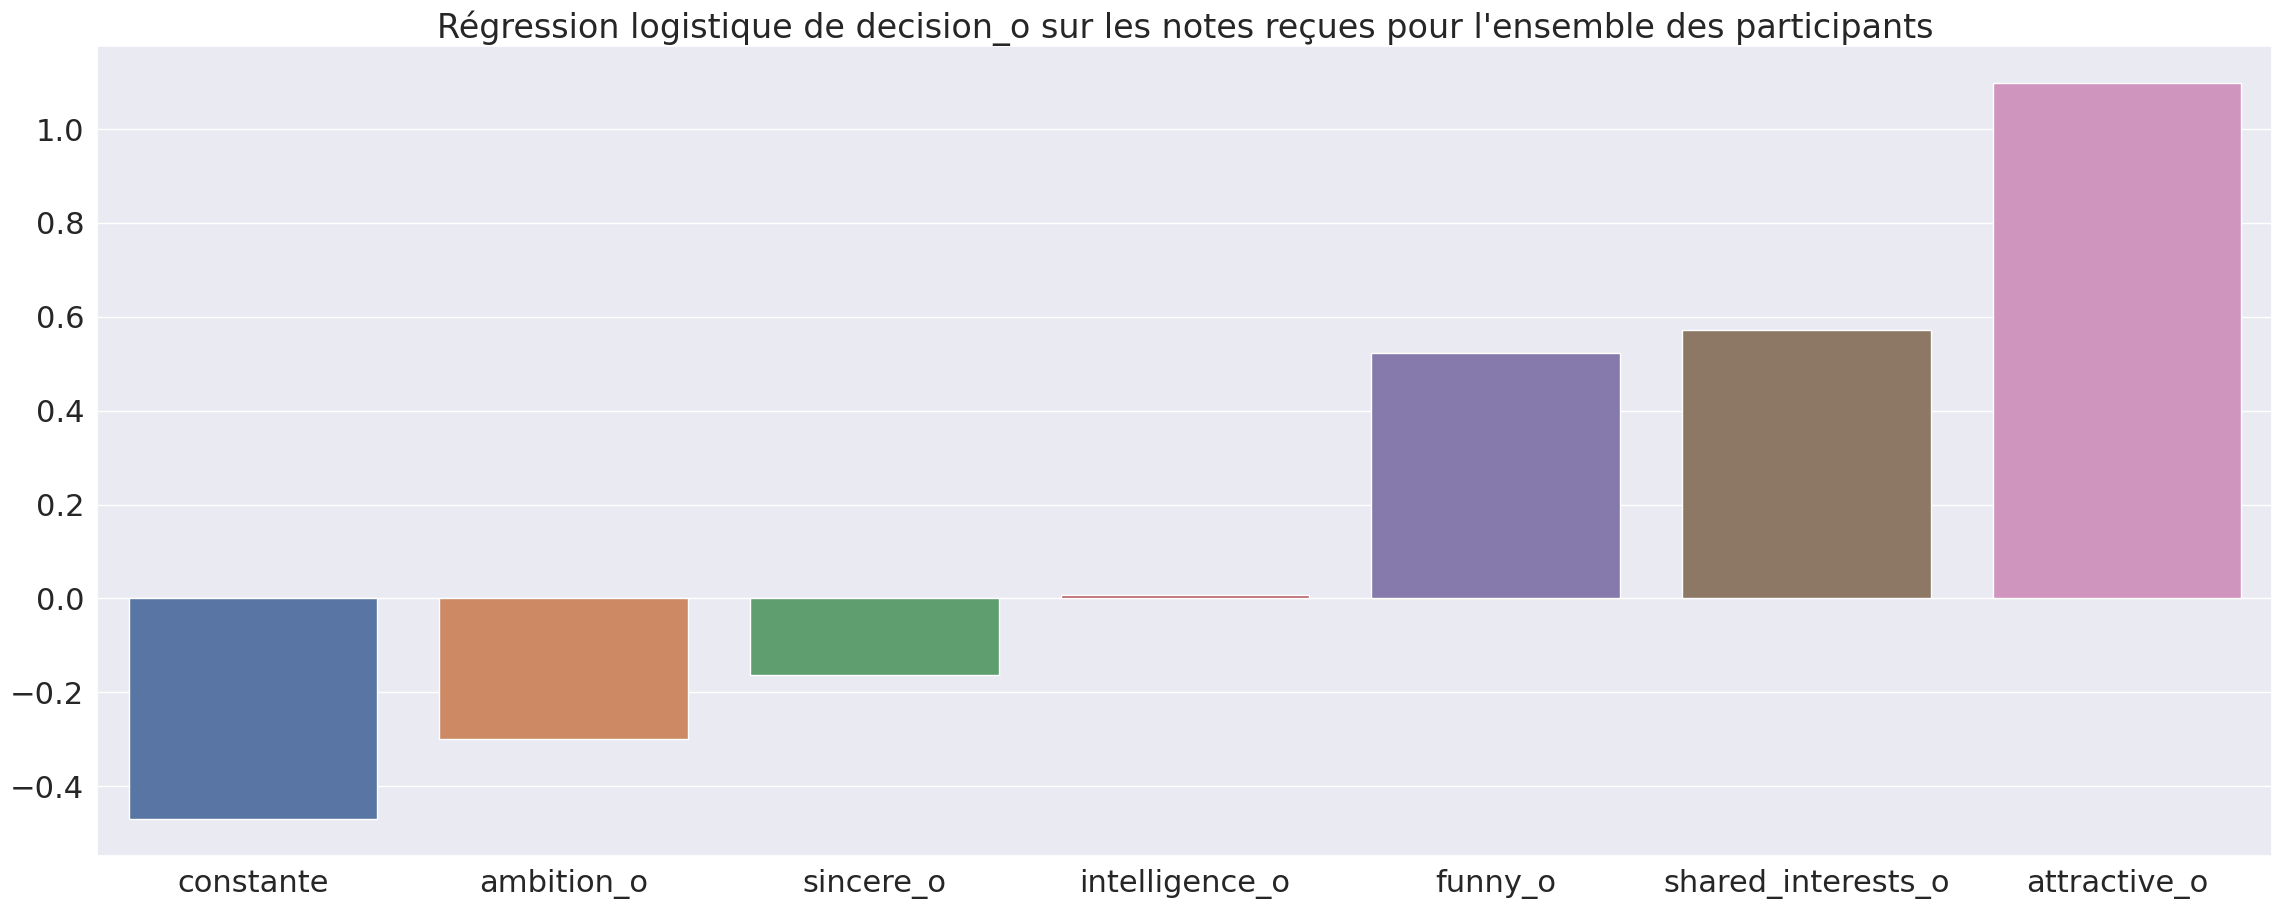

In [537]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.set(font_scale=2)
sns.barplot(sorted_df_n).set(title="Régression logistique de decision_o sur les notes reçues pour l'ensemble des participants")
plt.show()

#### Sans surprise, sur les caractéristiques plus générales, si le partenaire trouve l'individu attirant(e), il/elle va vouloir le/la revoir. Même raisonnement pour centres d'intérêts partagés. Bizarre au niveau de ambition_o et sincere_o (coeff négatif)? A réfléchir